In [345]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [346]:
# reading tour dataframes
df = pd.read_csv(r'..\Tour data\all_Tours.csv')

In [347]:
# showing the first 5 rows
df.head()

,Unnamed: 0,Image,Tour Name,Tour Type,Tour Duration,Tour Price,Price Per,Cancellation,Tour By,City,Country,Link
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear all filters,Abu Dhabi,United Arab Emirates,NaN
1,1,https://dynamic-media-cdn.tripadvisor.com/medi...,Abu Dhabi Full-Day Sightseeing Tour from Dubai,Bus Tours,6+ hours,$40.00,per adult,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://www.tripadvisor.com/Attraction_Review-...
2,2,https://dynamic-media-cdn.tripadvisor.com/medi...,"Evening Desert Safari With BBQ Dinner, Camel R...",Shore Excursions,6 hours,$83.00,per adult,Free cancellation,By Emirates Tours and Safaris,Abu Dhabi,United Arab Emirates,https://www.tripadvisor.com/Attraction_Review-...
3,3,NaN,NaN,Cold feet?,NaN,NaN,NaN,NaN,NaN,Abu Dhabi,United Arab Emirates,NaN
4,4,https://dynamic-media-cdn.tripadvisor.com/medi...,Dubai to Abu Dhabi Grand Mosque & Qasr Al Wata...,Bus Tours,8–9 hours,$109.00,per adult,Free cancellation,By OceanAir Travels,Abu Dhabi,United Arab Emirates,https://www.tripadvisor.com/Attraction_Review-...


In [348]:
# information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16974 entries, 0 to 16973
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     16974 non-null  int64 
 1   Image          15775 non-null  object
 2   Tour Name      15813 non-null  object
 3   Tour Type      13984 non-null  object
 4   Tour Duration  16336 non-null  object
 5   Tour Price     15852 non-null  object
 6   Price Per      15813 non-null  object
 7   Cancellation   13447 non-null  object
 8   Tour By        16160 non-null  object
 9   City           16974 non-null  object
 10  Country        16974 non-null  object
 11  Link           15645 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.6+ MB


**Issues**

- Remove Unnamed: 0 column
- Drop the null values
- Remove $ from Tour Price and convert it to float
- Replace Image column before the link
- Rename the Link column (Agency Link)
- Tour Duration convert different unit into one unit (in hour) deal with the different format of the time value.

In [349]:
# making copy for cleaning
df_clean = df.copy()

## Cleaning 

*1. General cleaning* <br>
*1.1 Drop the null values*

In [350]:
# drop the null value
df_clean = df_clean.dropna()

*1.2 Rename Tour Name, Tour Type, Tour Duration, Tour Price & Link columns*

In [351]:
# renaming the columns
df_clean.rename(columns={'Tour Name':'Tour', 'Tour Type':'Type', 'Tour Duration':'Duration', 'Tour Price':'Price', 'Link':'Link to agency'}, inplace=True)

In [352]:
# check the above
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10913 entries, 1 to 16971
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      10913 non-null  int64 
 1   Image           10913 non-null  object
 2   Tour            10913 non-null  object
 3   Type            10913 non-null  object
 4   Duration        10913 non-null  object
 5   Price           10913 non-null  object
 6   Price Per       10913 non-null  object
 7   Cancellation    10913 non-null  object
 8   Tour By         10913 non-null  object
 9   City            10913 non-null  object
 10  Country         10913 non-null  object
 11  Link to agency  10913 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


*2. Specific column cleaning*
<br>
*2.1 Remove unnecessary column*

In [353]:
# drop the Unnamed: 0 column
df_clean.drop('Unnamed: 0', axis=1, inplace=True)

*2.2 Image column*

In [354]:
# Replace the image column
df_clean = df_clean[['Tour', 'Type', 'Duration', 'Price', 'Price Per', 'Cancellation','Tour By', 'City', 'Country', 'Image', 'Link to agency']]

*2.3 Tour Name column*

In [355]:
# check the number of unique values in Tour name
df_clean['Tour'].nunique()

10526

*Since the number of unique value in the Tour column is not the same number of entries in the dataset. This mean there are so many duplicates in the name. Whereas, the Tour column should be all unique.*

In [356]:
# check the value counts in Tour name
df_clean['Tour'].value_counts()

Abu Dhabi City Tour From Dubai                                                    7
4 in 1 package sale (Dubai City tour-Safari-dinner cruise-Abu Dhabi City tour)    6
Private Abu Dhabi City Tour                                                       5
Abu Dhabi City Tour                                                               4
Essaouira Day Trip from Marrakech                                                 4
                                                                                 ..
Evening Trails Through Diverse Kuala Lumpur                                       1
First Day : Arrival Transfer with Malaysia Countryside and Batu Caves Tour        1
Kuala Lumpur Sightseeing Tour                                                     1
Genting Highland Tour                                                             1
Half-Day Vienna City Tour with Entrance to Schonbrunn Palace                      1
Name: Tour, Length: 10526, dtype: int64

In [357]:
# drop the duplicates in Tour column
df_clean.drop_duplicates(subset=['Tour'],inplace=True)

In [358]:
# to check the above
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10526 entries, 1 to 16961
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tour            10526 non-null  object
 1   Type            10526 non-null  object
 2   Duration        10526 non-null  object
 3   Price           10526 non-null  object
 4   Price Per       10526 non-null  object
 5   Cancellation    10526 non-null  object
 6   Tour By         10526 non-null  object
 7   City            10526 non-null  object
 8   Country         10526 non-null  object
 9   Image           10526 non-null  object
 10  Link to agency  10526 non-null  object
dtypes: object(11)
memory usage: 986.8+ KB


*2.4 Tour Type column*

In [359]:
# check the number of unique values in Tour Type
df_clean['Type'].nunique()

129

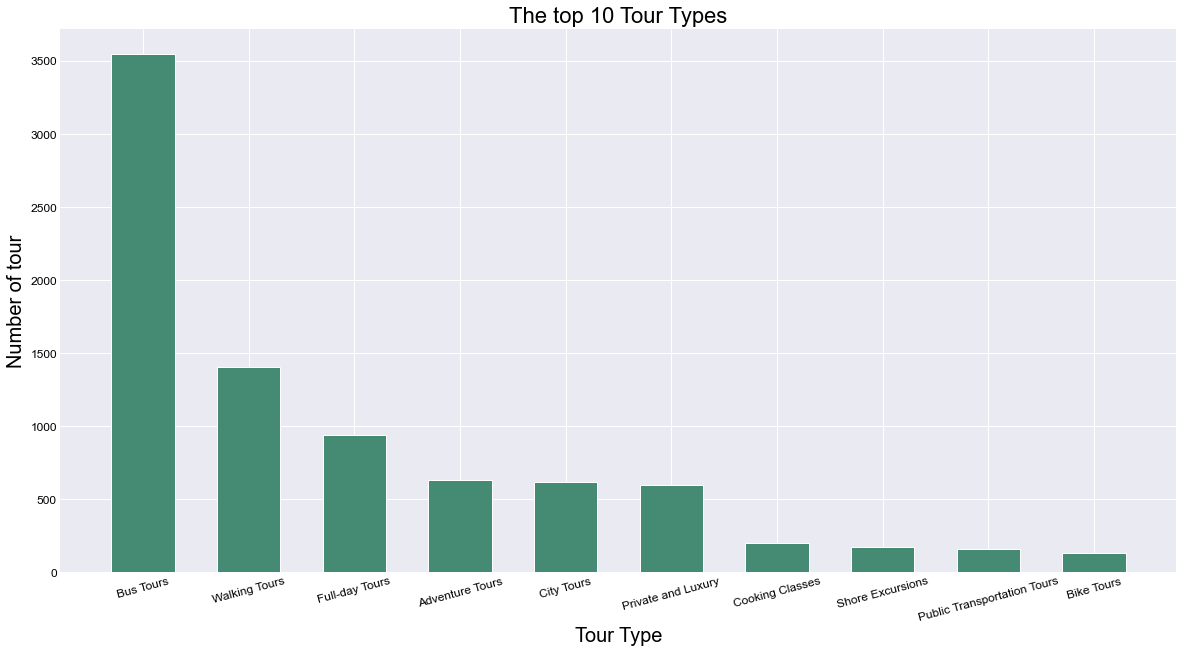

In [360]:
# Bar chart for the top 10 Type
x = df_clean['Type'].value_counts().head(10).index
y = df_clean['Type'].value_counts().head(10)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
plt.xticks( color ='#000000',fontsize=12, rotation = 15)
plt.yticks(color ='#000000',fontsize=12)
plt.bar(x, y, color= ('#458B74'), width=0.6)
plt.xlabel('Tour Type',fontsize=20, color ='#000000')
plt.ylabel('Number of tour',fontsize=20, color ='#000000')
plt.title('The top 10 Tour Types',fontsize=22, color ='#000000')
plt.show();

*Bus Tours is the top type of tour in thid dataset, with more than 3500 Tours.  Followwed by the walking Tours*

*2.5 Tour Duration column*

In [361]:
# check the number of unique values in Tour Duration
df_clean['Duration'].nunique()

238

In [362]:
# check the value count in Tour Duration
df_clean['Duration'].value_counts()

6+ hours           2256
3 hours            1235
4 hours             903
2 hours             794
2–3 hours           568
                   ... 
700–750 minutes       1
3–30 days             1
6–20 minutes          1
5–13 hours            1
80–90 minutes         1
Name: Duration, Length: 238, dtype: int64

*The values in this column are in different units: days, hours and minutes.*
*So, let separate the units first and then convert them all inot one unit (in hour).*
*The values with range I will calculate the average of them. As what I saw back in the tripadvisor.com.*

*2.5.1 Separate the time value and the duration unit in two columns*

In [363]:
# separate each the duration (in number) and the unit making new columns
df_clean[['Time','Unit']] = df_clean.Duration.str.split(" ",expand=True)
df_clean

,Tour,Type,Duration,Price,Price Per,Cancellation,Tour By,City,Country,Image,Link to agency,Time,Unit
1,Abu Dhabi Full-Day Sightseeing Tour from Dubai,Bus Tours,6+ hours,$40.00,per adult,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,6+,hours
2,"Evening Desert Safari With BBQ Dinner, Camel R...",Shore Excursions,6 hours,$83.00,per adult,Free cancellation,By Emirates Tours and Safaris,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,6,hours
4,Dubai to Abu Dhabi Grand Mosque & Qasr Al Wata...,Bus Tours,8–9 hours,$109.00,per adult,Free cancellation,By OceanAir Travels,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,8–9,hours
5,Abu Dhabi Private City Tour,Bus Tours,5 hours,$200.00,per group,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,5,hours
6,"Abu Dhabi City Tour - Grand Mosque, Emirates P...",Bus Tours,8–9 hours,$75.00,per adult,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,8–9,hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16948,Vienna Sightseeing Day Trip from Prague,Bus Tours,6+ hours,$146.14,per adult,Free cancellation,By Gray Line Prague,Vienna,Austria,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,6+,hours
16949,Crime Trail Vienna Alsergrund,Self-guided Tours & Rentals,3 hours,$28.28,per group,Free cancellation,By Krimi-Trail Wien Alsergrund,Vienna,Austria,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,3,hours
16955,Vienna: Schönbrunn Skip the Line Palace Tour a...,Walking Tours,1–2 hours,$92.66,per adult,Free cancellation,By Rosotravel - Vienna Tours,Vienna,Austria,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,1–2,hours
16956,Salzburg Christmas Markets Day Trip from Vienna,Full-day Tours,6+ hours,$191.20,per adult,Free cancellation,By White Alligator Tours,Vienna,Austria,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,6+,hours


*2.5.2 Removing other characters in Time column*

In [364]:
# removing the + sign from Time column, by using str.replace
df_clean['Time'] = df_clean['Time'].str.replace('+', '')
df_clean['Time'] = df_clean['Time'].str.replace(',', '')

C:\Users\Fatemah\AppData\Local\Temp/ipykernel_21876/2870402399.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['Time'] = df_clean['Time'].str.replace('+', '')


*After removing + sign and the comma , now I can separate the other format in Time column* <br> 
<br>
*2.5.3 Separate the numbers in Time column to minimum duration & maximum duration*

In [365]:
# separate each the Time value in XX-XX this format to two column minD (minimum Duration) & maxD (maximum Duration)
df_clean[['minD','maxD']] = df_clean.Time.str.split("–",expand=True)
df_clean

,Tour,Type,Duration,Price,Price Per,Cancellation,Tour By,City,Country,Image,Link to agency,Time,Unit,minD,maxD
1,Abu Dhabi Full-Day Sightseeing Tour from Dubai,Bus Tours,6+ hours,$40.00,per adult,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,6,hours,6,None
2,"Evening Desert Safari With BBQ Dinner, Camel R...",Shore Excursions,6 hours,$83.00,per adult,Free cancellation,By Emirates Tours and Safaris,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,6,hours,6,None
4,Dubai to Abu Dhabi Grand Mosque & Qasr Al Wata...,Bus Tours,8–9 hours,$109.00,per adult,Free cancellation,By OceanAir Travels,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,8–9,hours,8,9
5,Abu Dhabi Private City Tour,Bus Tours,5 hours,$200.00,per group,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,5,hours,5,None
6,"Abu Dhabi City Tour - Grand Mosque, Emirates P...",Bus Tours,8–9 hours,$75.00,per adult,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,8–9,hours,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16948,Vienna Sightseeing Day Trip from Prague,Bus Tours,6+ hours,$146.14,per adult,Free cancellation,By Gray Line Prague,Vienna,Austria,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,6,hours,6,None
16949,Crime Trail Vienna Alsergrund,Self-guided Tours & Rentals,3 hours,$28.28,per group,Free cancellation,By Krimi-Trail Wien Alsergrund,Vienna,Austria,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,3,hours,3,None
16955,Vienna: Schönbrunn Skip the Line Palace Tour a...,Walking Tours,1–2 hours,$92.66,per adult,Free cancellation,By Rosotravel - Vienna Tours,Vienna,Austria,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,1–2,hours,1,2
16956,Salzburg Christmas Markets Day Trip from Vienna,Full-day Tours,6+ hours,$191.20,per adult,Free cancellation,By White Alligator Tours,Vienna,Austria,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...,6,hours,6,None


*2.5.4 Convert data type to float*

In [366]:
# convert the data type of minD & maxD to float
df_clean['minD'] = pd.to_numeric(df_clean['minD'], downcast="float")
df_clean['maxD'] = pd.to_numeric(df_clean['maxD'], downcast="float")

*2.5.5 Calculate time average*

In [367]:
# fill the null value in maxD with the same vale in minD for later on average
df_clean['maxD'].fillna(df_clean['minD'], inplace=True)

In [368]:
# calculating the average Time
df_clean['AverageTime'] = (df_clean['minD'] + df_clean['maxD']) / 2

In [369]:
# drop the Duration, Time, minD & maxD columns
df_clean.drop(['Duration', 'Time', 'minD','maxD'], axis=1, inplace=True)

*2.5.6 Convert time average to hours*

In [370]:
# Convert days to hours
df_clean.loc[df_clean['Unit']=='days', ['AverageTime']] *= 24
df_clean.loc[df_clean['Unit']=='days', ['AverageTime']] *= 24

# Convert minutes to hours
df_clean.loc[df_clean['Unit']=='minutes', ['AverageTime']] /= 60
df_clean.loc[df_clean['Unit']=='minute', ['AverageTime']] /= 60

# make sure hour will be the same
df_clean.loc[df_clean['Unit']=='hours', ['AverageTime']] *= 1
df_clean.loc[df_clean['Unit']=='hour', ['AverageTime']] *= 1

*2.5.7 Rename, drop and replace columns after convertaing to average time in hour*

In [371]:
# Rename AverageTime column
df_clean.rename(columns={'AverageTime':'Duration'}, inplace=True)

In [372]:
# drop the Unit column
df_clean.drop('Unit', axis=1, inplace=True)

In [373]:
# Replace the image column
df_clean = df_clean[['Tour', 'Type', 'Duration', 'Price', 'Price Per', 'Cancellation','Tour By', 'City', 'Country', 'Image', 'Link to agency']]

In [374]:
# limit a float to two decimal places
df_clean.Duration = round(df_clean.Duration, 2)

In [375]:
# check the values
df_clean.Duration.value_counts()

6.00     2593
3.00     1290
4.00      951
2.00      834
2.50      589
         ... 
0.29        1
18.50       1
0.26        1
0.15        1
0.23        1
Name: Duration, Length: 132, dtype: int64

In [376]:
# check all the changes in the above section 2.5 Tour Duration column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10526 entries, 1 to 16961
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tour            10526 non-null  object 
 1   Type            10526 non-null  object 
 2   Duration        10526 non-null  float32
 3   Price           10526 non-null  object 
 4   Price Per       10526 non-null  object 
 5   Cancellation    10526 non-null  object 
 6   Tour By         10526 non-null  object 
 7   City            10526 non-null  object 
 8   Country         10526 non-null  object 
 9   Image           10526 non-null  object 
 10  Link to agency  10526 non-null  object 
dtypes: float32(1), object(10)
memory usage: 945.7+ KB


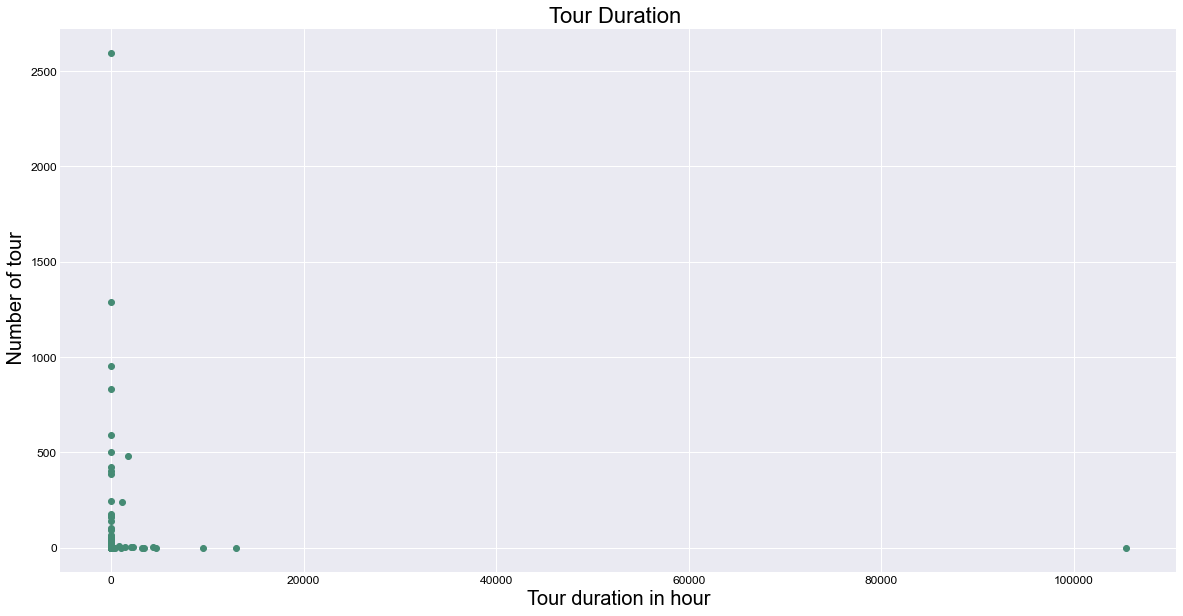

In [377]:
# scatter chart for the tour duration
x = df_clean['Duration'].value_counts().index
y = df_clean['Duration'].value_counts()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
plt.scatter(x, y, color='#458B74')
plt.xticks( color ='#000000',fontsize=12)
plt.yticks(color ='#000000',fontsize=12)
plt.xlabel('Tour duration in hour',fontsize=20, color ='#000000')
plt.ylabel(' Number of tour',fontsize=20, color ='#000000')
plt.title('Tour Duration ',fontsize=22, color ='#000000')
plt.show();

*From the above plot, we can see the extrem value in the tour duration. With more than 100,000 hours*

In [378]:
# finding the maximum value and drop it
df_clean['Duration'].max()

105408.0

In [379]:
# drop the extrem value
df_clean = df_clean[df_clean.Duration != 105408.0]

In [380]:
# Statistic summary of price column
df_clean['Duration'].describe()

count    10525.000000
mean       114.938957
std        433.824341
min          0.020000
25%          2.500000
50%          4.000000
75%          6.000000
max      12960.000000
Name: Duration, dtype: float64

*Most of the Tours take 4-6 hours in average. Some of the tours are really long because it extends for days*

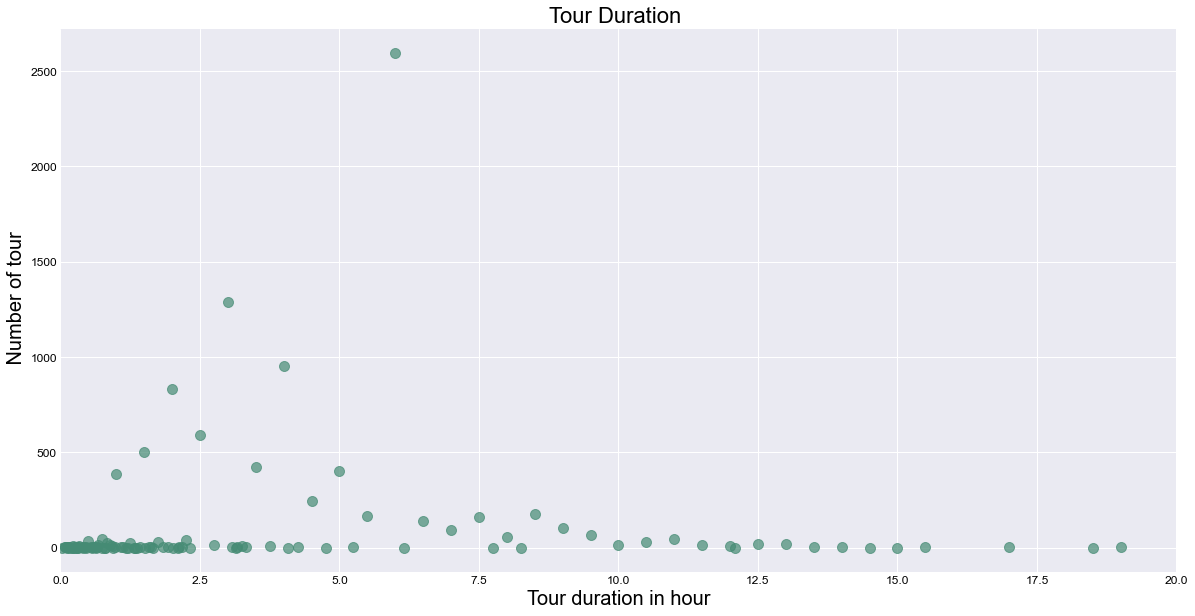

In [381]:
# scatter chart for the tour duration after droping the extrem
x = df_clean['Duration'].value_counts().index
y = df_clean['Duration'].value_counts()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
plt.scatter(x, y, color='#458B74', s=100, alpha=0.7)
plt.xlim(0, 20)
plt.xticks( color ='#000000',fontsize=12)
plt.yticks(color ='#000000',fontsize=12)
plt.xlabel('Tour duration in hour',fontsize=20, color ='#000000')
plt.ylabel(' Number of tour',fontsize=20, color ='#000000')
plt.title('Tour Duration ',fontsize=22, color ='#000000')
plt.show();

*Most of the tours in this dataset are less than 5 hours long*

*2.6 Tour Price column*

In [382]:
# removing the $ sign and , from ‘Price’ column using str.replace
df_clean['Price'] = df_clean['Price'].str.replace('$', '')
df_clean['Price'] = df_clean['Price'].str.replace(',', '')

C:\Users\Fatemah\AppData\Local\Temp/ipykernel_21876/440693180.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['Price'] = df_clean['Price'].str.replace('$', '')


In [383]:
# convert the data type of Price to float
df_clean['Price'] = pd.to_numeric(df_clean['Price'], downcast="float")

In [384]:
# limit a float to two decimal places
df_clean.Price = round(df_clean.Price, 2)

In [385]:
# to check the above 
df_clean['Price'].dtype

dtype('float32')

In [386]:
# Statistic summary of price column
df_clean['Price'].describe()

count    10525.000000
mean       189.205704
std        360.772339
min          3.350000
25%         53.470001
50%         98.519997
75%        191.199997
max      12570.700195
Name: Price, dtype: float64

*The minimum tour price in this data is $3.35, whereas the maximum tour price is $12,570*

C:\Users\Fatemah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


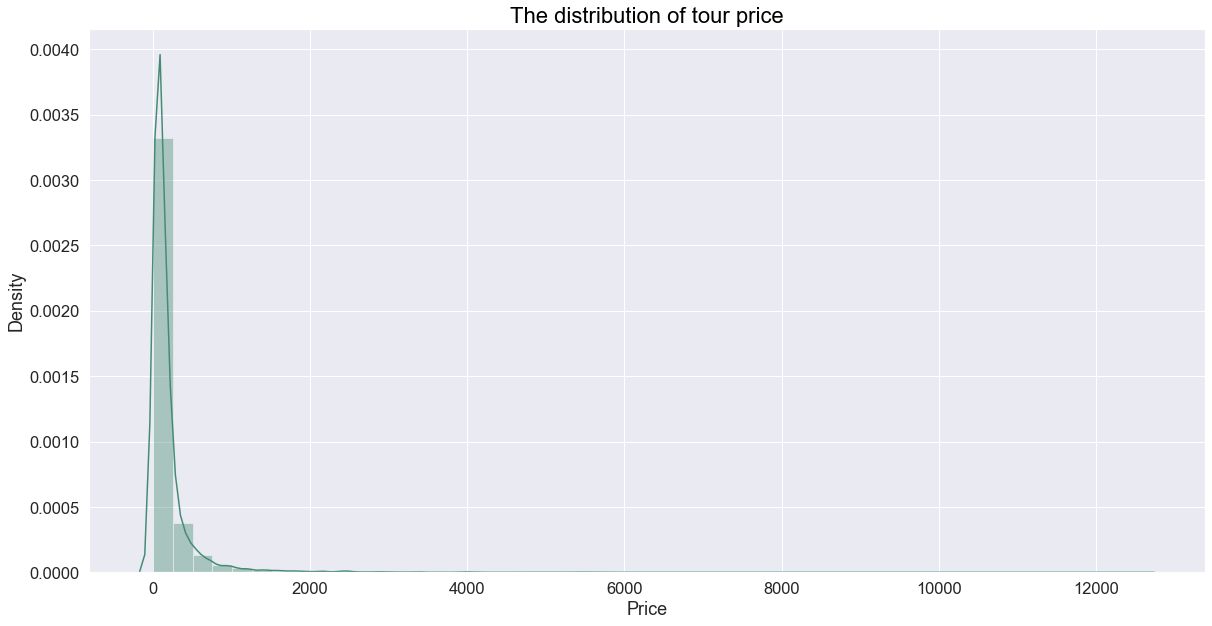

In [387]:
# distribution plot for the price
plt.style.use('seaborn-darkgrid')
sns.set(font_scale=1.5)
plt.figure(figsize=(20,10))
sns.distplot(df_clean['Price'],color= ('#458B74'))
plt.title('The distribution of tour price',fontsize=22, color ='#000000');

*2.7 Price Per adult/group*

In [388]:
# The average tour price based on per adult or per group
df_clean.groupby(['Price Per']).Price.agg(['mean'])

,mean
Price Per,
per adult,165.806137
per group,475.593109


*Thte average price per group is much higher than per adult*

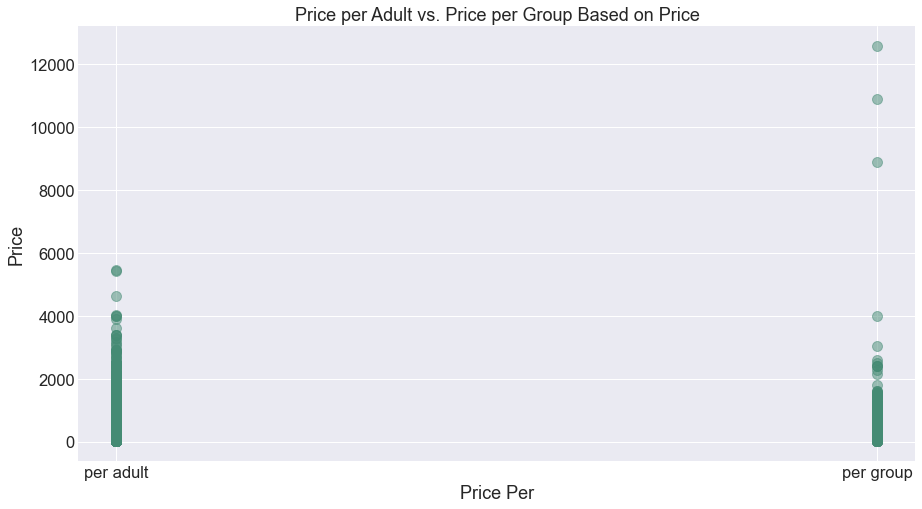

In [389]:
# Scatter plot of the price per adult vs. price per group
plt.style.use('seaborn-darkgrid')
df_clean.plot(x='Price Per', y='Price', kind='scatter',figsize=(15,8), color='#458B74', s=100, alpha=0.5 , title='Price per Adult vs. Price per Group Based on Price');

*2.8 Cancellation column*

In [390]:
# check the column values 
df_clean['Cancellation'].value_counts()

Free cancellation      10524
LIKELY TO SELL OUT*        1
Name: Cancellation, dtype: int64

In [391]:
# remove the LIKELY TO SELL OUT* value
df_clean = df_clean[df_clean.Cancellation != 'LIKELY TO SELL OUT*']

*All of the Tours in this dataset are flexible booking and provide free cancellation.*

*2.9 Tour By column*

In [392]:
# number of unique value
df_clean['Tour By'].nunique()

3444

*There are 3444 different agencies providing tours in this dataset*

*2.10 City & Country columns*

In [393]:
# show number of unique values in each city & country column
print('Number of unoque value in City column:',df_clean['City'].nunique())
print('Number of unoque value in Country column:',df_clean['Country'].nunique())

Number of unoque value in City column: 38
Number of unoque value in Country column: 28


In [394]:
# reset the index
df_clean.reset_index(drop=True)

,Tour,Type,Duration,Price,Price Per,Cancellation,Tour By,City,Country,Image,Link to agency
0,Abu Dhabi Full-Day Sightseeing Tour from Dubai,Bus Tours,6.0,40.000000,per adult,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
1,"Evening Desert Safari With BBQ Dinner, Camel R...",Shore Excursions,6.0,83.000000,per adult,Free cancellation,By Emirates Tours and Safaris,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
2,Dubai to Abu Dhabi Grand Mosque & Qasr Al Wata...,Bus Tours,8.5,109.000000,per adult,Free cancellation,By OceanAir Travels,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
3,Abu Dhabi Private City Tour,Bus Tours,5.0,200.000000,per group,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
4,"Abu Dhabi City Tour - Grand Mosque, Emirates P...",Bus Tours,8.5,75.000000,per adult,Free cancellation,By RAH Tourism,Abu Dhabi,United Arab Emirates,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
...,...,...,...,...,...,...,...,...,...,...,...
10519,Vienna Sightseeing Day Trip from Prague,Bus Tours,6.0,146.139999,per adult,Free cancellation,By Gray Line Prague,Vienna,Austria,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
10520,Crime Trail Vienna Alsergrund,Self-guided Tours & Rentals,3.0,28.280001,per group,Free cancellation,By Krimi-Trail Wien Alsergrund,Vienna,Austria,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
10521,Vienna: Schönbrunn Skip the Line Palace Tour a...,Walking Tours,1.5,92.660004,per adult,Free cancellation,By Rosotravel - Vienna Tours,Vienna,Austria,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...
10522,Salzburg Christmas Markets Day Trip from Vienna,Full-day Tours,6.0,191.199997,per adult,Free cancellation,By White Alligator Tours,Vienna,Austria,https://dynamic-media-cdn.tripadvisor.com/medi...,https://www.tripadvisor.com/Attraction_Review-...


In [395]:
# to check the last changes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10524 entries, 1 to 16961
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tour            10524 non-null  object 
 1   Type            10524 non-null  object 
 2   Duration        10524 non-null  float32
 3   Price           10524 non-null  float32
 4   Price Per       10524 non-null  object 
 5   Cancellation    10524 non-null  object 
 6   Tour By         10524 non-null  object 
 7   City            10524 non-null  object 
 8   Country         10524 non-null  object 
 9   Image           10524 non-null  object 
 10  Link to agency  10524 non-null  object 
dtypes: float32(2), object(9)
memory usage: 904.4+ KB


In [396]:
# Store the clean dataset
df_clean.to_csv('clean_df.csv')